In [1]:
import pandas
print('pandas',pandas.__version__)
import numpy
print('numpy',numpy.__version__)
import glob
from scipy.fftpack import fft, ifft
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import random
import time
import matplotlib.pyplot as plt

pandas 0.23.4
numpy 1.13.3


In [2]:
start_time=time.time()
df=pandas.read_pickle('power_data.pkl')
df.reset_index(inplace=True)
df.shape
print('elapsed:',time.time()-start_time,'seconds')

elapsed: 0.4278848171234131 seconds


In [3]:
df.head()

,index,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,ERCOT
0,0,2006-01-01 01:00:00.003,7623.394894,788.305875,1026.559049,777.157535,7549.809438,1852.416802,3797.223989,639.553370,24054.420954
1,1,2006-01-01 01:59:59.997,7437.102525,779.587442,1024.320168,752.171350,7291.494704,1770.283786,3637.505535,628.083900,23320.549410
2,2,2006-01-01 03:00:00.000,7151.481479,767.310985,1011.297406,725.028737,7012.269706,1676.891230,3482.207530,614.014931,22440.502004
3,3,2006-01-01 04:00:00.003,6957.302786,774.671447,1004.026250,711.968331,6896.466664,1609.080496,3363.417807,611.227308,21928.161089
4,4,2006-01-01 04:59:59.997,6861.596790,772.916673,1005.141879,708.933070,6810.395549,1595.417621,3303.547499,613.746434,21671.695516



Sampling frequency is once per hour

I expect recurring patterns daily (24 hours), weekly (7\*24 hours), and yearly (365\*24 hours)

In [4]:
y = fft(df['EAST'])

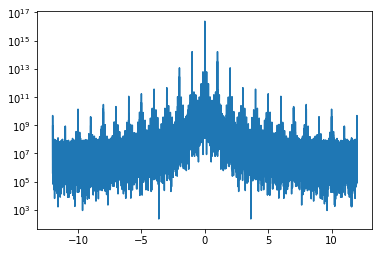

In [5]:
# https://stackoverflow.com/questions/15382076/plotting-power-spectrum-in-python

ps = numpy.abs(numpy.fft.fft(df['EAST']))**2

# https://stackoverflow.com/questions/3694918/how-to-extract-frequency-associated-with-fft-values-in-python
time_step = 1 / 24
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html
freqs = numpy.fft.fftfreq(df['EAST'].shape[0], time_step)
idx = numpy.argsort(freqs)

plt.semilogy(freqs[idx], ps[idx]);

Another method to get the first half of a list

In [6]:
alst=list(range(20))
print(alst[0:len(alst)//2])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/opt/conda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


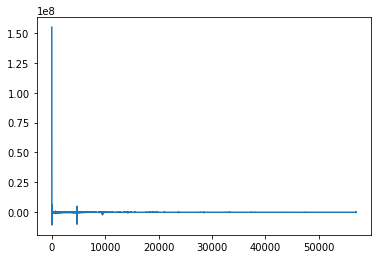

In [7]:
plt.plot(y[0:len(y)//2]);

elapsed: 0.0612337589263916 seconds


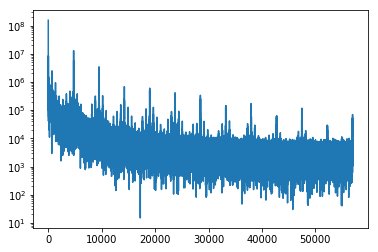

In [8]:
start_time=time.time()
plt.semilogy(abs(y[0:len(y)//2]));
print('elapsed:',time.time()-start_time,'seconds')

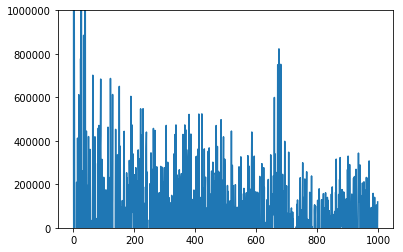

In [9]:
plt.plot(y[0:1000]);
plt.ylim([0,1000000]);

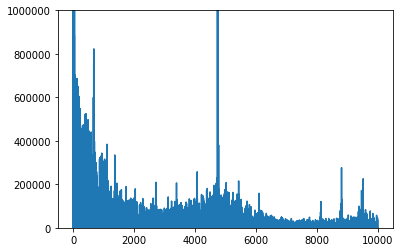

In [10]:
plt.plot(y[0:10000]);
plt.ylim([0,1000000]);

In [11]:
365*12

4380